In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
TRAINING_DATA = 'cleaned_housing_training_data.csv'
# TRAINING_DATA = 'clean_data/train.csv'
# PRICE_DATA = 'clean_data/salesprices.csv'

train = pd.read_csv(TRAINING_DATA)

In [3]:
train.shape

(1457, 222)

In [4]:
if 'SalePrice' in list(train.columns):
    y_train = train['SalePrice']
    del train['SalePrice']
else:
    y_train = pd.read_csv(PRICE_DATA)
    y_train.columns = ['SalePrice']
    y_train = y_train.values.ravel()

## Fix the column names

In [5]:
COLUMNS_TO_KEEP = {
    'LotArea': 'Lot Area',
    'YearBuilt': 'Year Built',
    'YearRemodAdd': 'Year Remodelled',
    'GrLivArea': 'Living Area in Sq. Ft.',
    'GarageCars': 'Garage Car Capacity',
    'BedroomAbvGr': '# of Bedrooms',
    'FullBath': '# of Bathrooms'
}

In [6]:
for i in train.columns:
    if i not in COLUMNS_TO_KEEP:
        del train[i]

In [7]:
train.head()

,LotArea,YearBuilt,YearRemodAdd,GrLivArea,FullBath,BedroomAbvGr,GarageCars
0,8450,2003,2003,7.444249,2,3,2
1,9600,1976,1976,7.140453,2,3,2
2,11250,2001,2002,7.487734,2,3,2
3,9550,1915,1970,7.448334,1,3,3
4,14260,2000,2000,7.695303,2,4,3


In [8]:
cols = []
for i in train.columns:
    cols.append(COLUMNS_TO_KEEP[i])

train.columns = cols
train.head()

,Lot Area,Year Built,Year Remodelled,Living Area in Sq. Ft.,# of Bathrooms,# of Bedrooms,Garage Car Capacity
0,8450,2003,2003,7.444249,2,3,2
1,9600,1976,1976,7.140453,2,3,2
2,11250,2001,2002,7.487734,2,3,2
3,9550,1915,1970,7.448334,1,3,3
4,14260,2000,2000,7.695303,2,4,3


## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train, y_train)

y_train_pred = lr.predict(train)

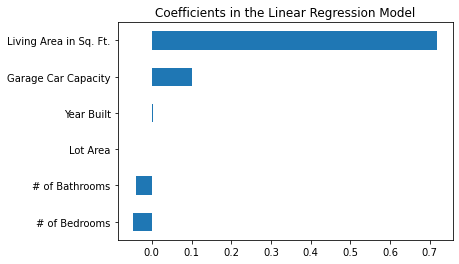

In [11]:
coefs = pd.Series(list(lr.coef_), index=train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(3),
                     coefs.sort_values().tail(3)])
imp_coefs.plot(kind = "barh")

plt.title("Coefficients in the Linear Regression Model")
plt.show()

## Lasso Regression

In [12]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0001


In [13]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05


Lasso picked 7 features and eliminated the other 0 features


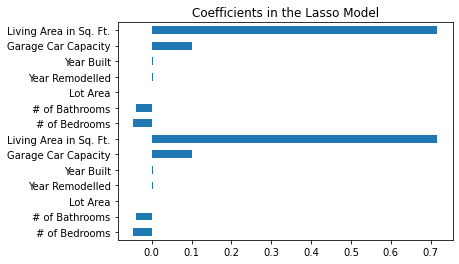

In [14]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# What are the dropped coefficients? We will need this to create the writeup

## Decision Tree Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train, y_train)

DecisionTreeRegressor(max_depth=3)

''

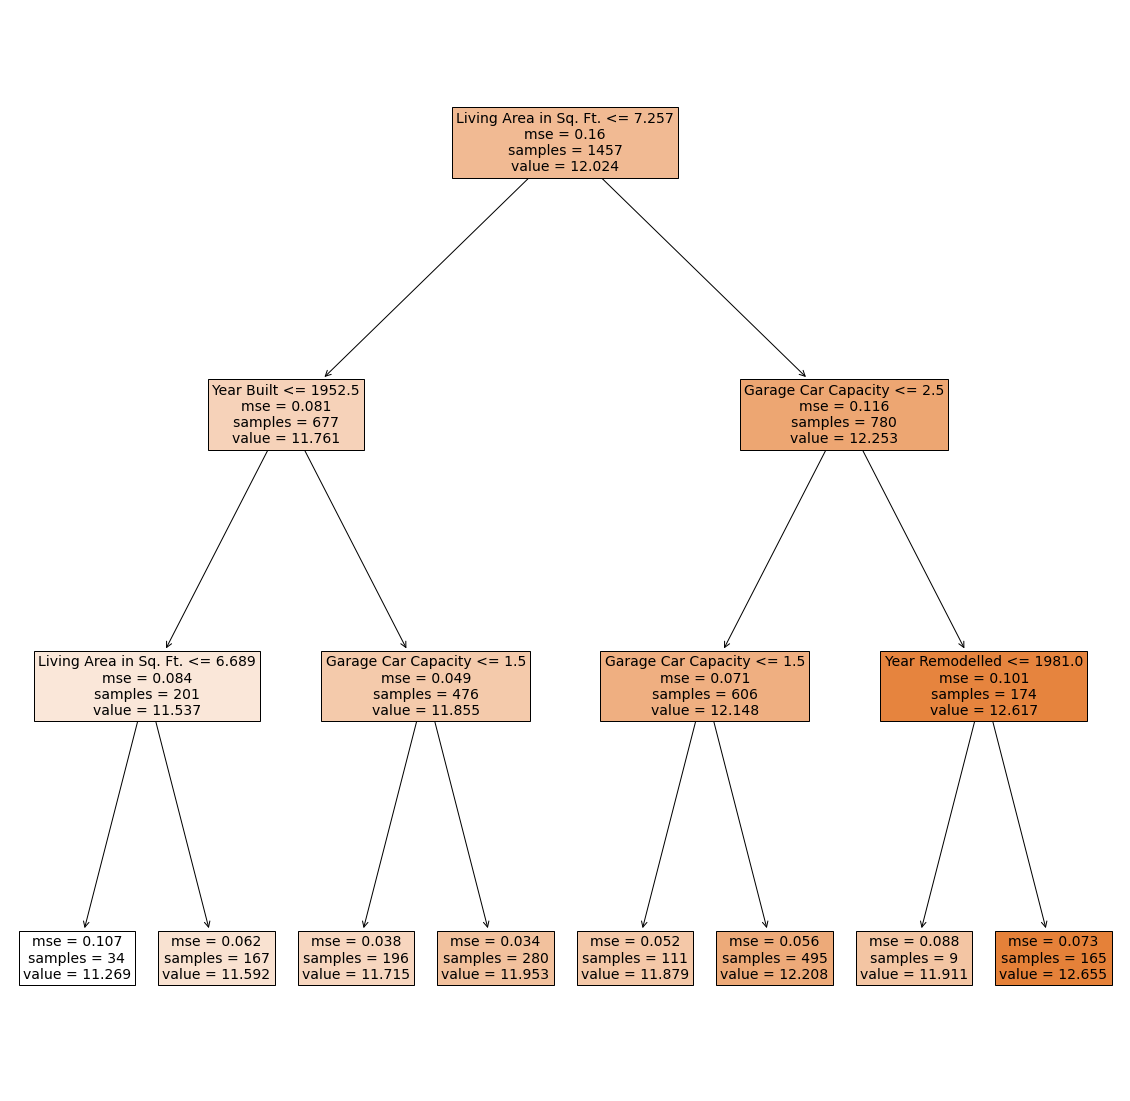

In [16]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtr, feature_names=train.columns, fontsize=14, filled=True)
''

## Random Forest Regression

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

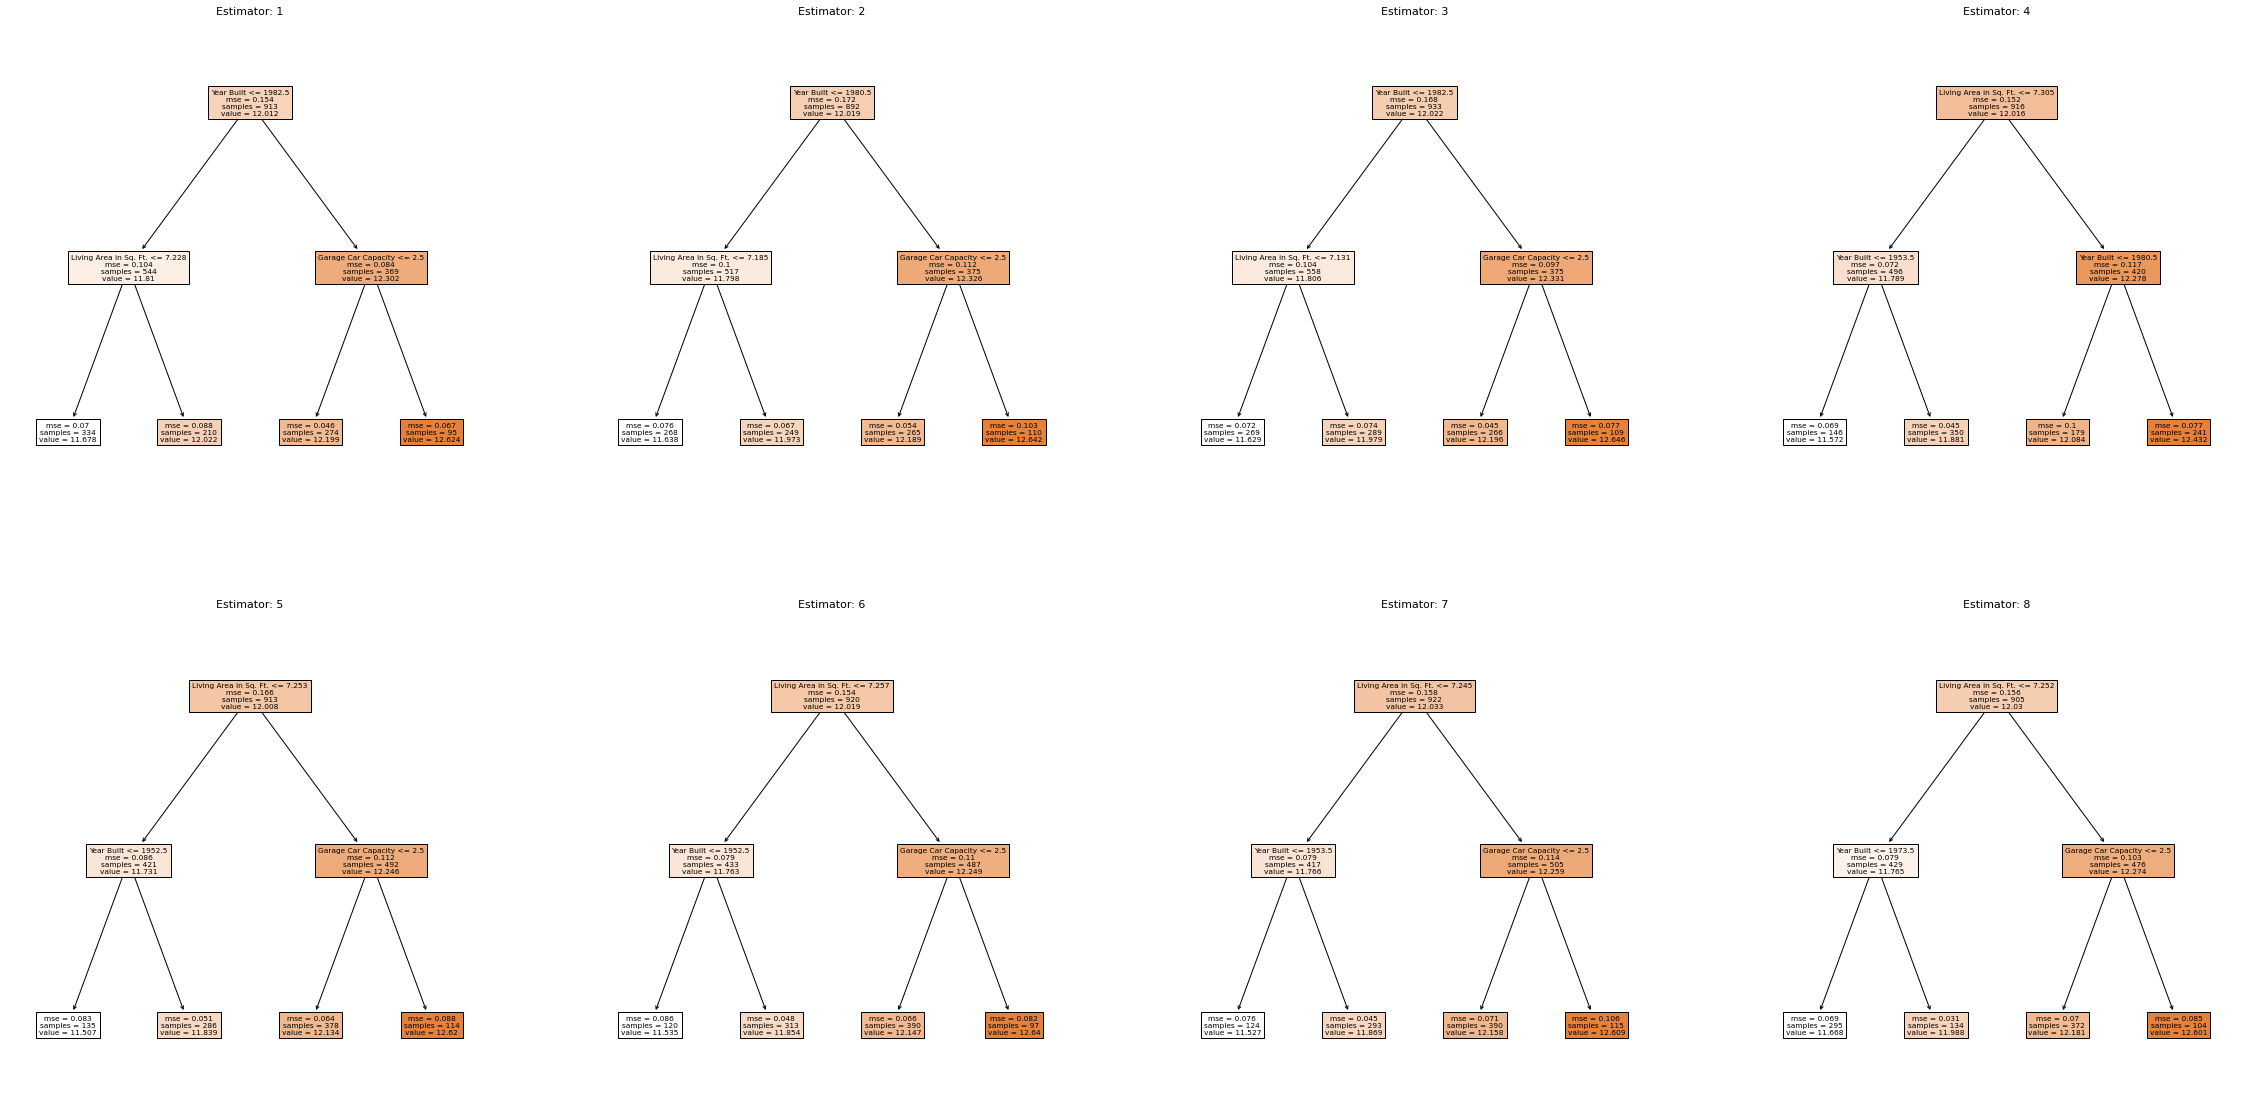

In [20]:
rows = 2
cols = 4

fig, axes = plt.subplots(nrows = rows,ncols = cols,figsize = (cols*10,rows*10))
for index in range(0, rows*cols):
    row = int(index / cols)
    col = index - row*cols
    plot_tree(rfr.estimators_[index],
               feature_names = train.columns, 
               filled = True,
               ax = axes[row, col]);

    axes[row, col].set_title('Estimator: ' + str(index + 1), fontsize = 11)

## k-NN Regression

In [21]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=2)

knn.fit(train, y_train)

NearestNeighbors(n_neighbors=2)